In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_df = pd.read_csv('weatherAUS.csv')

In [3]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.dropna(subset=['RainTomorrow'], inplace = True)

Data and Visualisation is done in Rain-Tomorrow-LogisticRegression as same dataset is used

### Training Validation and Test Sets

<Axes: title={'center': 'Number of Rows per year'}, xlabel='Date', ylabel='count'>

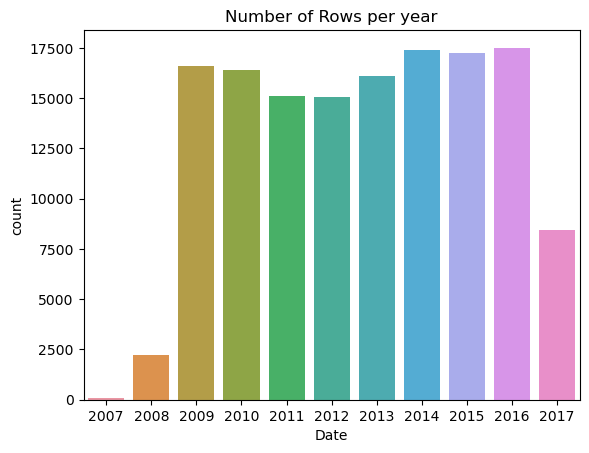

In [6]:
plt.title('Number of Rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [7]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [8]:
train_df.shape,val_df.shape,test_df.shape

((98988, 23), (17231, 23), (25974, 23))

##### Input And Target Columns

In [9]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [11]:
val_inputs.shape

(17231, 21)

Now, lets identify categorical and numerical columns

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [13]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


##### Imputing missing numeric values

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [17]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [18]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

##### Scaling Numeric Features

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [21]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [22]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


#### Encoding Categorical Data

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(raw_df[categorical_cols])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [26]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_85687/1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_85687/1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_85687/1584174743.py:1: PerformanceWarning: DataFrame is highl

In [27]:
test_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [29]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.037723,0.525852,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Training and Visualising Decision Trees


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(random_state=42)

In [32]:
%%time
model.fit(X_train,train_targets)

CPU times: user 1.67 s, sys: 51.1 ms, total: 1.73 s
Wall time: 1.77 s


DecisionTreeClassifier(random_state=42)

#### Evaluation Score

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
train_preds = model.predict(X_train)

In [35]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [36]:
pd.value_counts(train_preds)

/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_85687/1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [37]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [38]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

Training Data set have an accuracy of near about 100%

In [39]:
print(type(X_val))
print(type(val_targets))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [40]:
model.score(X_val, val_targets)

0.7930474145435552

In [41]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

#### Visualisation

In [43]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

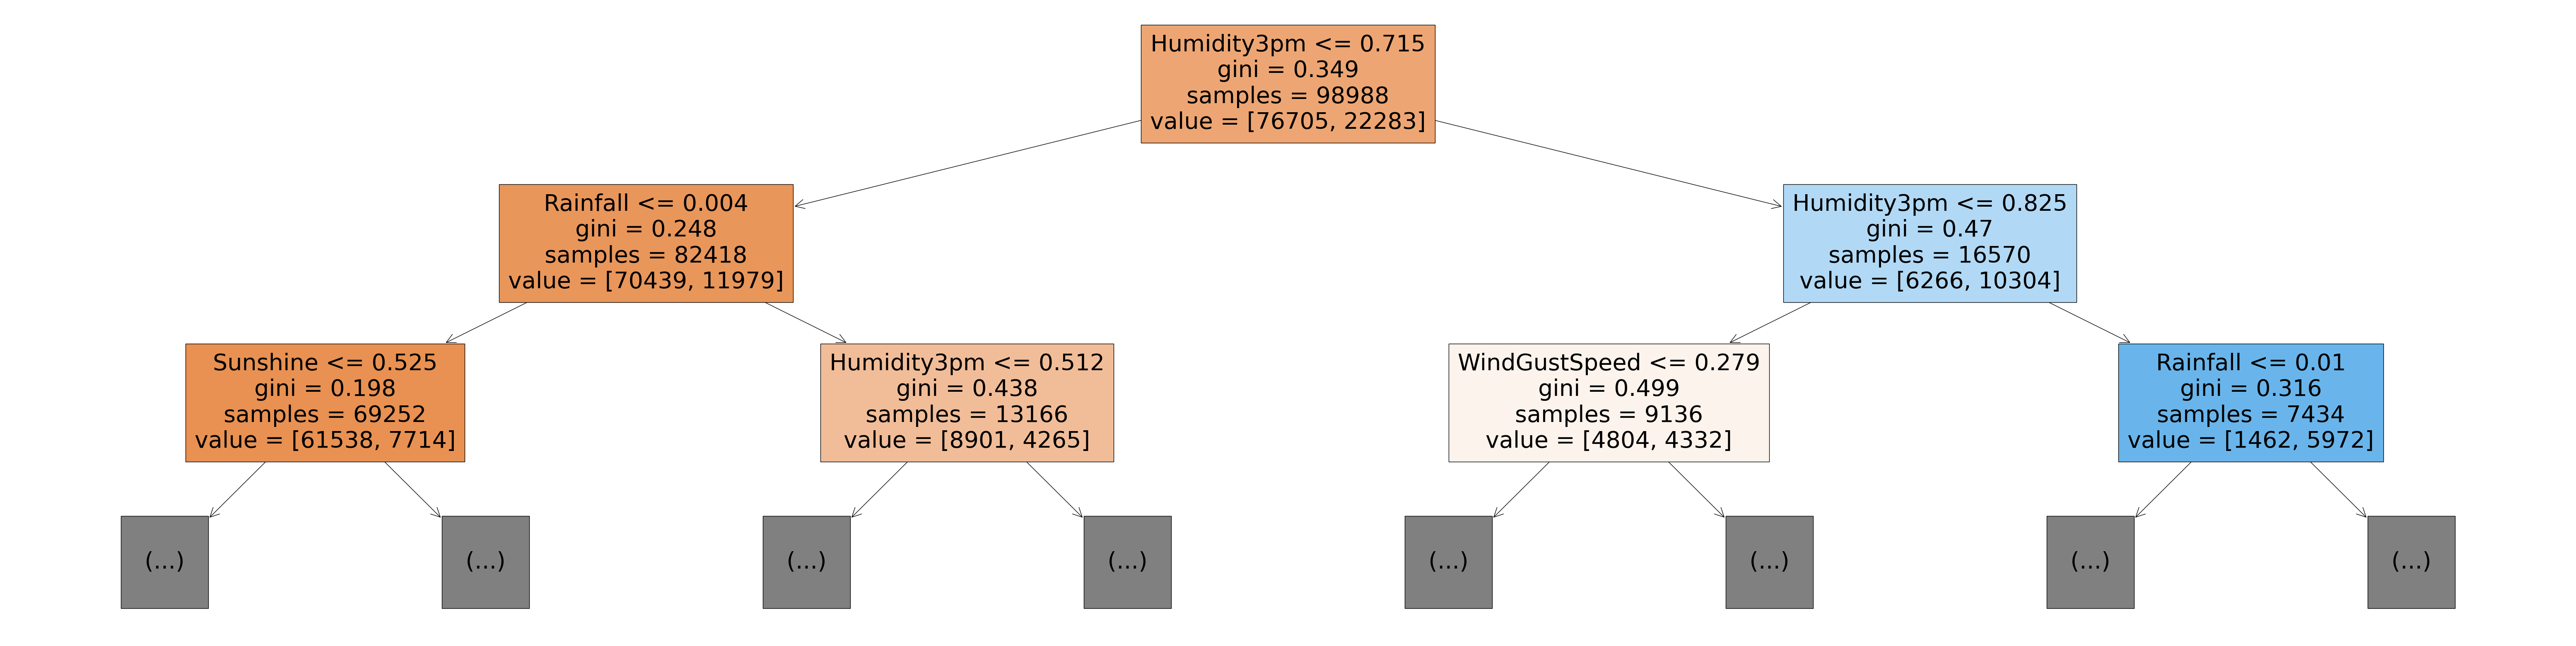

In [47]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2, filled=True)

In [48]:
model.tree_.max_depth

48

In [49]:
model.feature_importances_


array([3.73083815e-02, 3.02365929e-02, 5.82038189e-02, 2.35768827e-02,
       5.03465940e-02, 5.45054931e-02, 2.81783248e-02, 2.98931442e-02,
       4.04337758e-02, 2.61385763e-01, 3.34532500e-02, 6.24446920e-02,
       1.35437586e-02, 1.81261261e-02, 3.33058767e-02, 3.12940383e-02,
       2.47111719e-03, 2.18858688e-03, 1.33604274e-03, 7.19064667e-04,
       1.52038061e-03, 1.12690211e-03, 6.82901814e-04, 1.66279053e-03,
       9.97929648e-04, 1.36352755e-03, 8.06793551e-04, 2.06603280e-03,
       1.59592206e-03, 1.97657685e-04, 1.09697641e-03, 1.34911075e-03,
       3.81128848e-04, 8.67184601e-04, 1.74071384e-03, 1.20433368e-03,
       7.96353537e-04, 8.40744369e-04, 1.60939585e-03, 2.14122047e-03,
       3.27138085e-04, 6.95394430e-04, 1.63883015e-03, 1.28791090e-03,
       1.27546087e-03, 9.20497841e-04, 8.03933544e-04, 1.51955885e-03,
       1.36320028e-03, 2.28086244e-03, 7.13302025e-04, 1.66866611e-03,
       9.07754620e-04, 1.40775569e-03, 1.15724626e-03, 4.91024770e-04,
      

In [51]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261386
11,Pressure3pm,0.062445
2,Rainfall,0.058204
5,WindGustSpeed,0.054505
4,Sunshine,0.050347
8,Humidity9am,0.040434
0,MinTemp,0.037308
10,Pressure9am,0.033453
14,Temp9am,0.033306
15,Temp3pm,0.031294


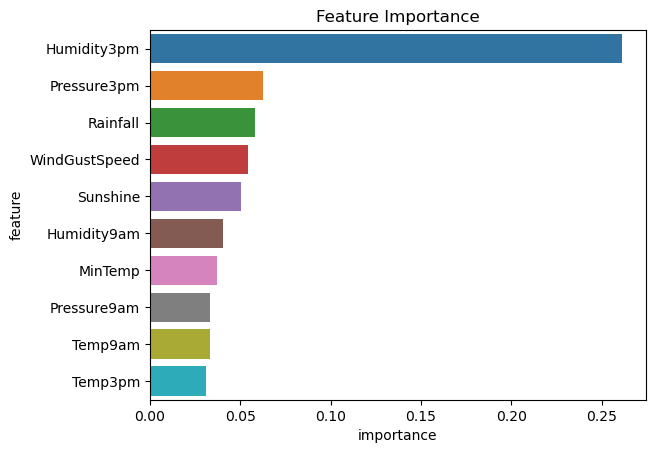

In [52]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

In [54]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
model.score(X_train,train_targets)

0.8291308037337859

In [57]:
model.classes_

array(['No', 'Yes'], dtype=object)

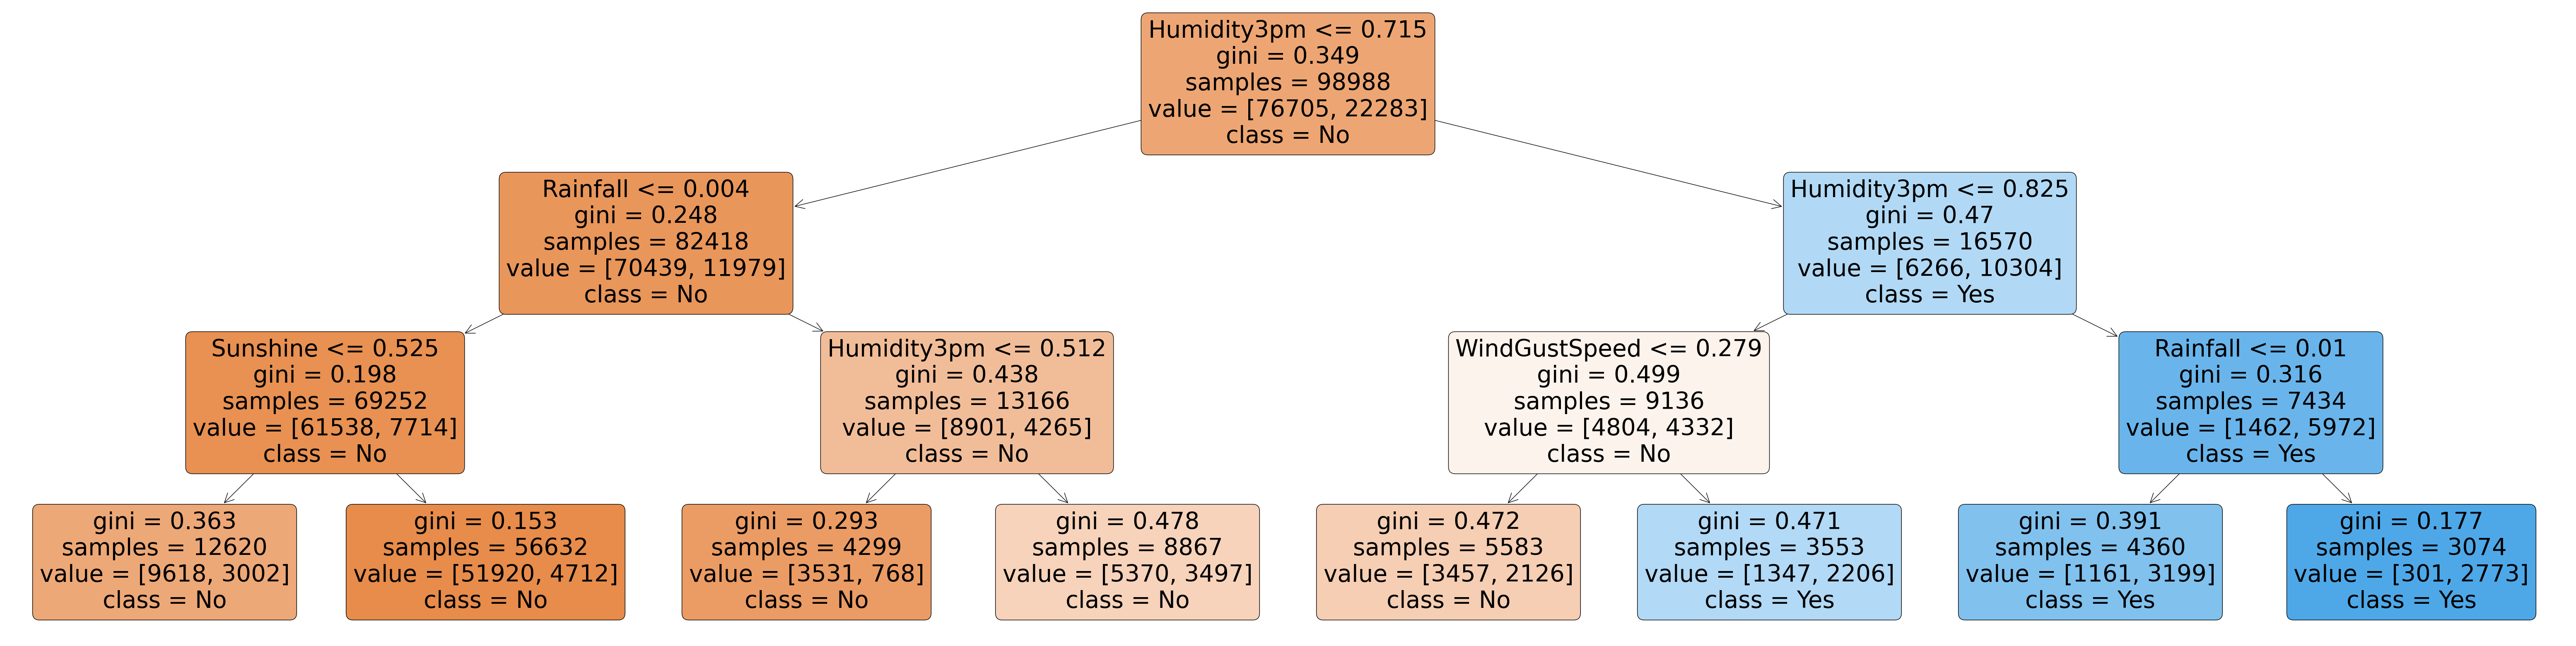

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [61]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1- model.score(X_train,train_targets)
    val_acc=1-model.score(X_val,val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [62]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [63]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132956,0.157391


In [65]:
model = DecisionTreeClassifier(max_depth=7,random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [66]:
model.score(X_val,val_targets)

0.8453949277465034

In [67]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [68]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [69]:
model.score(X_train, train_targets)

0.8480421869317493

In [70]:
model.score(X_val, val_targets)

0.8442342290058615

In [71]:
model.tree_.max_depth

12

## Training a Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [75]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [76]:
model.score(X_train,train_targets)

0.9999393865923142

In [77]:
model.score(X_val,val_targets)

0.8573501247751146

The training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

In [78]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.91, 0.09],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [79]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

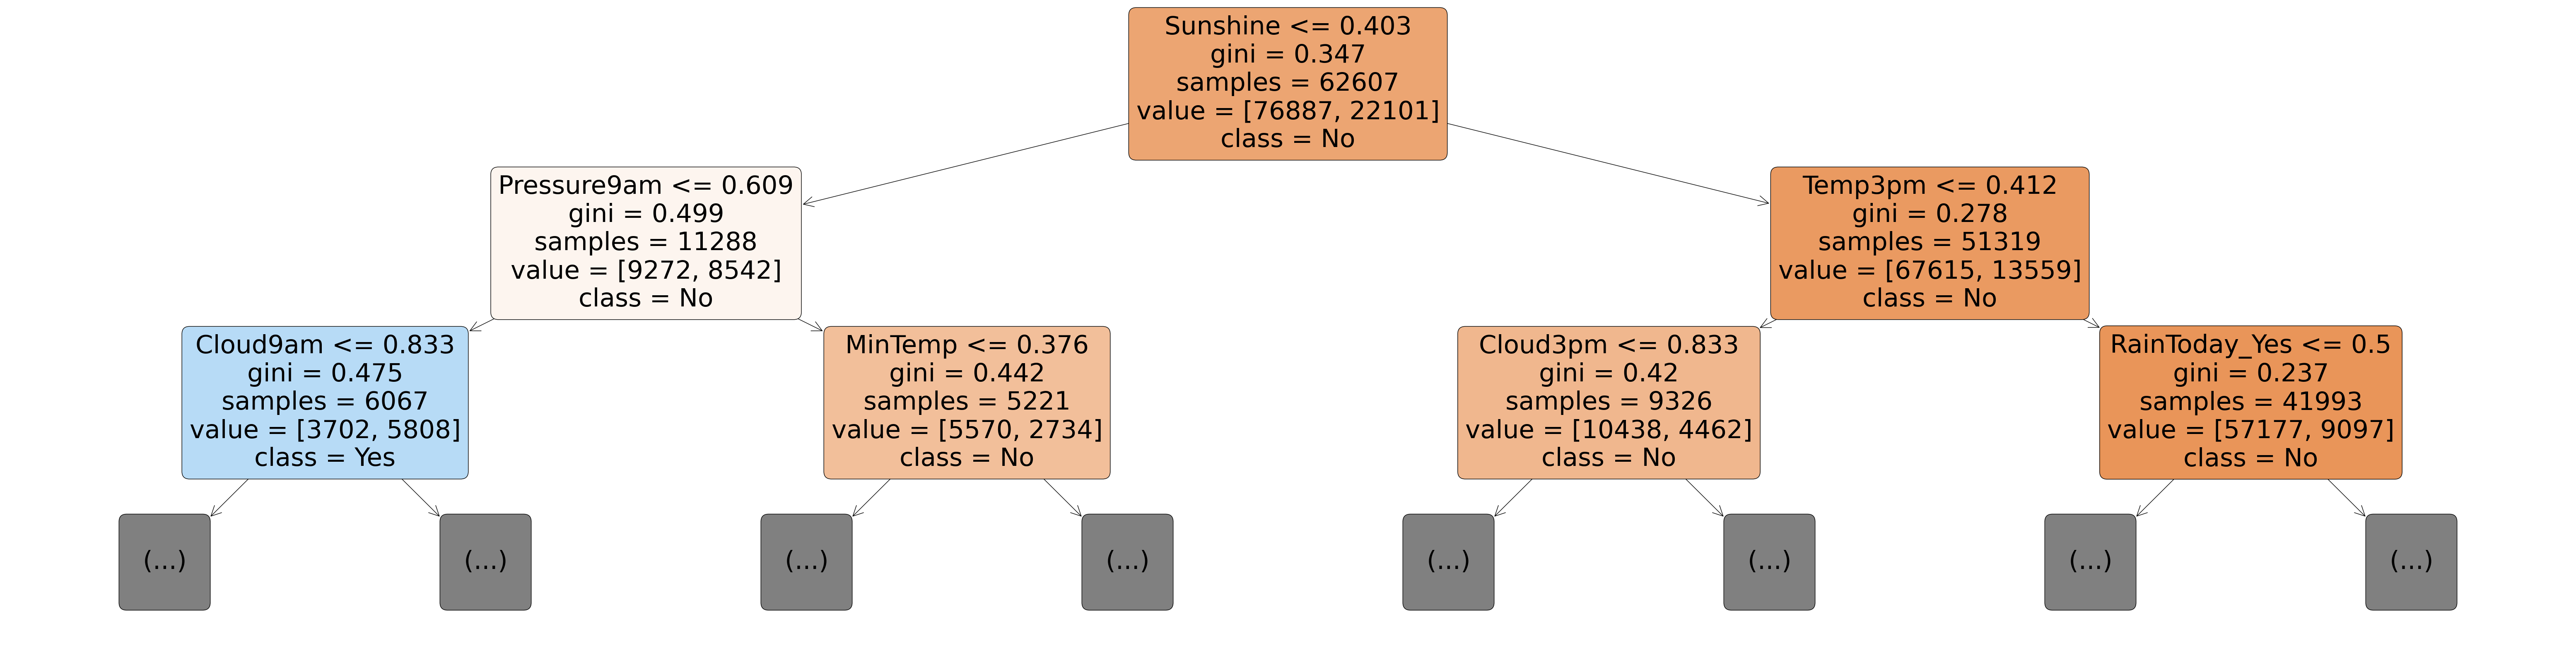

In [80]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

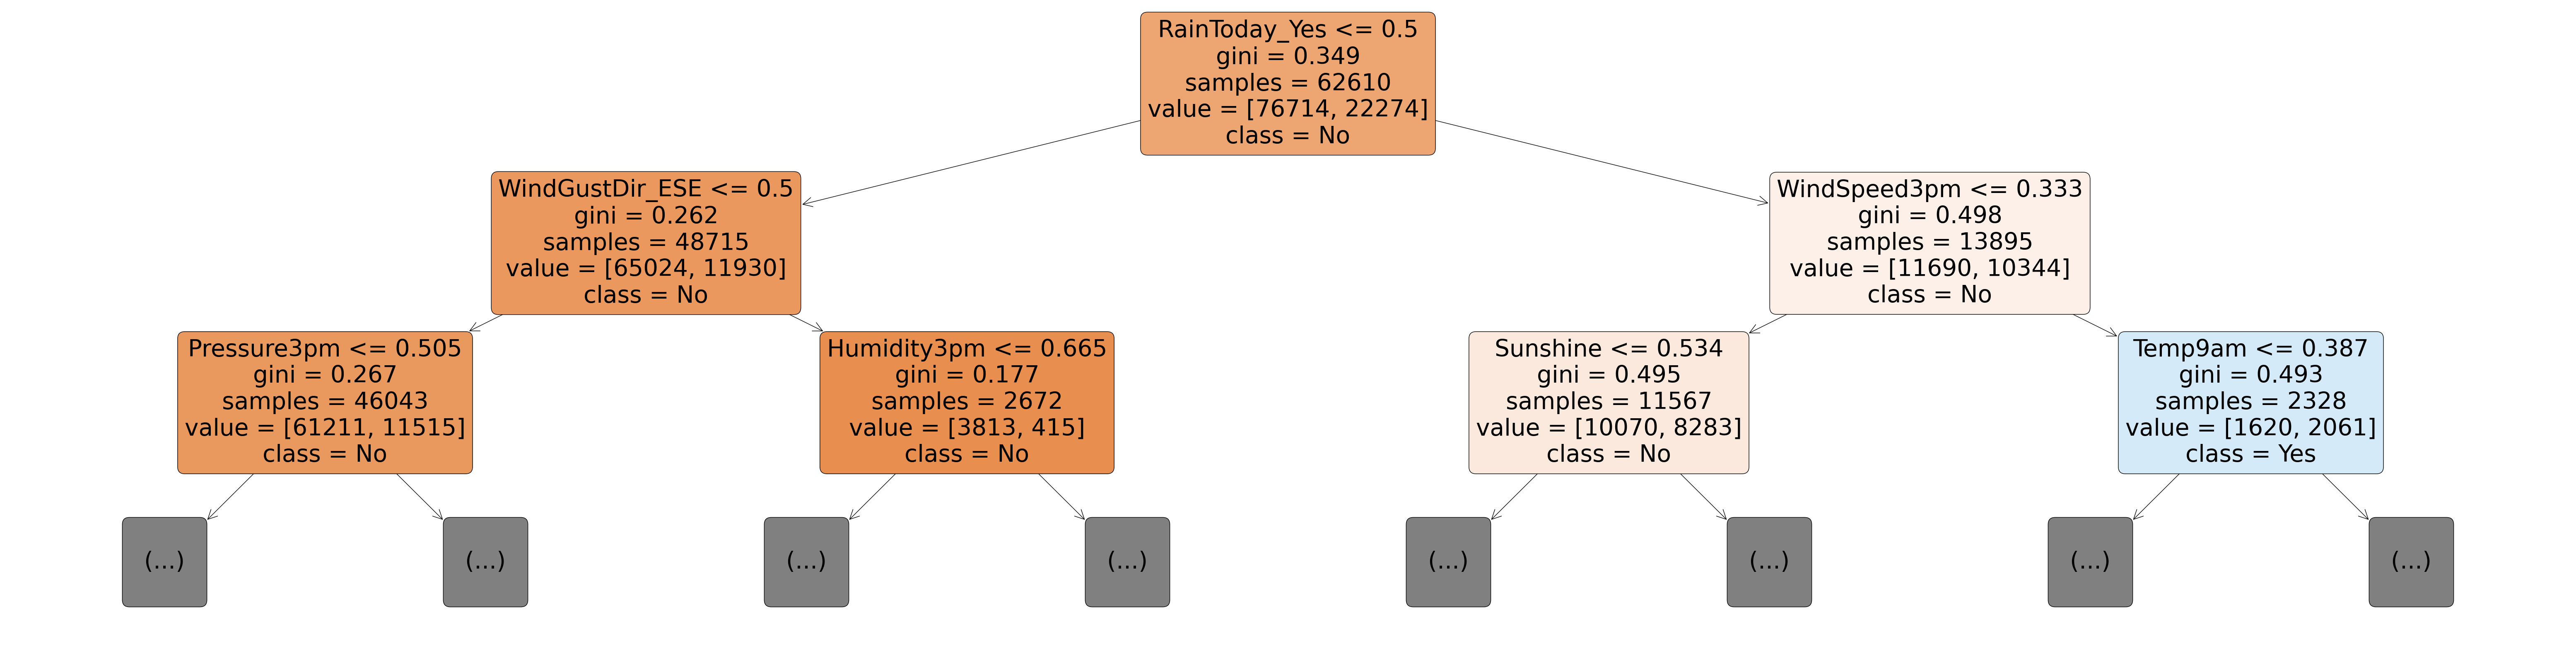

In [81]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [82]:
len(model.estimators_)

100

In [83]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.138062
4,Sunshine,0.054931
11,Pressure3pm,0.053627
8,Humidity9am,0.049703
10,Pressure9am,0.047772
2,Rainfall,0.047218
5,WindGustSpeed,0.047011
15,Temp3pm,0.044471
1,MaxTemp,0.041851
0,MinTemp,0.040733


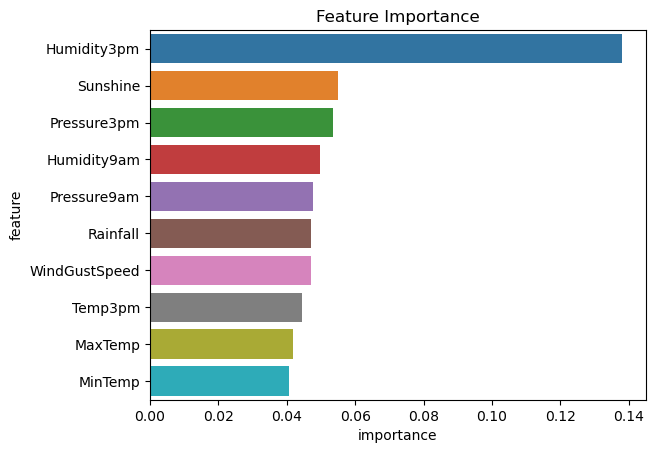

In [84]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning with Random Forests

In [85]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42).fit(X_train,train_targets)

In [87]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

base_accs = base_train_acc, base_val_acc
base_accs

(0.9999393865923142, 0.8573501247751146)

##### n_estimators

In [88]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [89]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [90]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9871398553360003, 0.8478904300388834)

In [91]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [92]:
model.score(X_val, val_targets)

0.8579304741454356

##### max_depth and max_leaf_nodes


In [93]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [94]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [95]:
test_params(max_depth=26)

(0.9807552430597648, 0.8565376356566653)

In [96]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

##### max_features

In [97]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [98]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

##### min_samples_split and min_samples_leaf

In [99]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625510162848022, 0.8556671116011839)

In [100]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8496080332969653, 0.8452208229354071)

##### min_impurity_decrease

In [101]:
test_params(min_impurity_decrease=1e-7)

(0.9996161150846568, 0.8565956705936975)

In [102]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

##### bootstrap, max_samples

In [103]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8575242295862109)

In [104]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8561894260344728)

In [105]:
base_accs

(0.9999393865923142, 0.8573501247751146)

##### class_weight

In [106]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8548546224827346)

In [107]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999393865923142, 0.8557831814752481)

### Training Final Model

In [108]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [109]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [110]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920293368893199, 0.8564215657826011)

In [111]:
model.score(X_test, test_targets)

0.8451913451913452

Test accuracy is lower as compared to validation and train accuracy.